In [111]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# Full Global Darwin Model Run

In [112]:
file = "/Users/birdy/Documents/eaps_research/gcm_analysis/gcm_data/darwin_weekly_seasonal/3d.nc"
seed_ds_3d = xr.open_dataset(file)
seed_ds_3d = seed_ds_3d.rename({'Zmd000023':'Z'})
seed_ds_3d

<xarray.Dataset>
Dimensions:      (Z: 23, X: 360, Y: 160, T: 52)
Coordinates:
  * X            (X) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * Y            (Y) float64 -79.5 -78.5 -77.5 -76.5 ... 76.5 77.5 78.5 79.5
  * T            (T) datetime64[ns] 2008-11-15 2008-11-22 ... 2009-11-07
Dimensions without coordinates: Z
Data variables: (12/77)
    diag_levels  (Z) float64 ...
    iter         (T) int32 ...
    TRAC01       (T, Z, Y, X) float32 ...
    TRAC02       (T, Z, Y, X) float32 ...
    TRAC03       (T, Z, Y, X) float32 ...
    TRAC04       (T, Z, Y, X) float32 ...
    ...           ...
    TRAC70       (T, Z, Y, X) float32 ...
    PP           (T, Z, Y, X) float32 ...
    Nfix         (T, Z, Y, X) float32 ...
    Denit        (T, Z, Y, X) float32 ...
    pH           (T, Z, Y, X) float32 ...
    pCO2         (T, Z, Y, X) float32 ...
Attributes: (12/18)
    MITgcm_version:  checkpoint68b
    build_user:      stephdut
    build_host:      node080
    build_date:      Thu Aug 26 12:06:38 EDT 2021
    MITgcm_URL:      http://mitgcm.org
    MITgcm_tag_id:   
    ...              ...
    nSy:             1
    nPx:             12
    nPy:             8
    Nx:              360
    Ny:              160
    Nr:              23

In [116]:
x = 205.5
y = slice(20,60)
z=0

In [150]:
# get the x,y points of the propocalypse on the original darwin model 
def get_og_propocalypse_line(x, y, z):
    pro_contour = seed_ds_3d["TRAC21"].isel(Z=z).sel(X=x, Y=y).T.plot.contourf(ax = ax, levels=[.001, 1])
    p1 = pro_contour.collections[0].get_paths()[1]
    p1_coords = p1.vertices

    propocalypse_x = []
    propocalypse_y = []

    for coord in p1_coords:
        # remove top 
        if coord[1] == 59.5:
            continue
        # remove sides 
        if coord[0] == 14555.0 or coord[0] == 14198.0:
            continue
        propocalypse_x.append(coord[0])
        propocalypse_y.append(coord[1]) 

    propocalypse_x = np.array(propocalypse_x)
    propocalypse_y = np.array(propocalypse_y)

    # convert time back into datatime 
    propocalypse_time = np.array(list(map(lambda x: np.datetime64(int(x), 'D'), propocalypse_x)))

    # sort 
    temp = np.array(sorted(list(zip(propocalypse_y, propocalypse_time)), key=lambda x: x[1]))
    propocalypse_lat = temp[:,0]
    propocalypse_time = temp[:,1]
    return propocalypse_time, propocalypse_lat

propocalypse_time, propocalypse_lat = get_og_propocalypse_line(x, y, z)

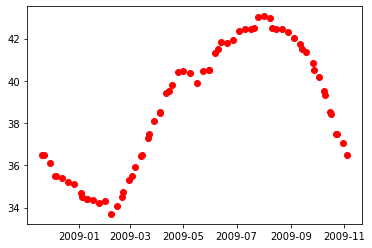

In [151]:
# plot the propocalypse contour line from the full darwin model run
def plot_og_propocalypse_line(ax, x=202.5, y=slice(20,60), z=0, c='r'):
    ax.scatter(propocalypse_time, propocalypse_lat, c=c)


fig, ax = plt.subplots()
plot_og_propocalypse_line(ax)
plt.show()

# Steady State Run

In [98]:
file = "/Users/birdy/Documents/eaps_research/darwin3/verification/dar_one_config/run/gp-lower-light-1/run/ecco_gud_20221206_0001/3d*"
tracer_ds = xr.open_mfdataset(file)
tracer_ds = tracer_ds.rename({'Zmd000001':'Z'})

tracer_ds = tracer_ds.isel(T=slice(-2, -1)).mean(dim="T")
tracer_ds = tracer_ds.where(tracer_ds>0, 0)

x_axis = seed_ds_3d["T"].data
y_axis = seed_ds_3d.isel(Y=slice(100, 137))["Y"].data

tracer_ds = tracer_ds.assign_coords({"Y":y_axis})
tracer_ds = tracer_ds.assign_coords({"X":x_axis})


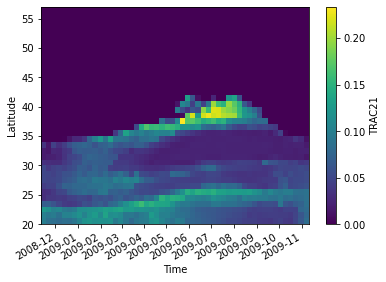

In [52]:
def pretty_plot_lat_over_time(ax, da, title="", plot_og_line=False, vmin=None, vmax=None):
    x_axis = seed_ds_3d["T"].data
    y_axis = seed_ds_3d.isel(Y=slice(100, 137))["Y"].data

    my_da = da.assign_coords({"Y":y_axis})
    my_da = my_da.assign_coords({"X":x_axis})

    my_da.plot(ax=ax, vmin=vmin, vmax=vmax)
    ax.set_xlabel("Time")
    ax.set_ylabel("Latitude")
    ax.set_title(title)
    if plot_og_line:
        ax.scatter(propocalypse_time, propocalypse_lat, c='r')

fig, ax = plt.subplots()
pretty_plot_lat_over_time(ax, tracer_ds["TRAC21"])
plt.show()

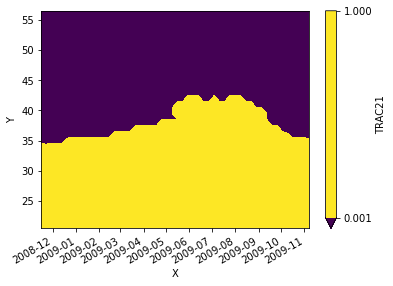

In [119]:
# get the x,y points of the propocalypse in the steady state model
def get_ss_propocalypse_line(tracer_ds=tracer_ds):
    x_axis = seed_ds_3d["T"].data
    y_axis = seed_ds_3d.isel(Y=slice(100, 137))["Y"].data

    da = tracer_ds["TRAC21"]
    my_da = da.assign_coords({"Y":y_axis})
    my_da = my_da.assign_coords({"X":x_axis})
    
    pro_contour = tracer_ds["TRAC21"].isel(Z=0).plot.contourf(levels=[.001, 1])
    p1 = pro_contour.collections[0].get_paths()[0]
    p1_coords = p1.vertices

    propocalypse_x = []
    propocalypse_y = []

    for coord in p1_coords:
        # remove top 
        if coord[1] == 56.5:
            continue
        # remove sides 
        if coord[0] == 14198 or coord[0] == 14555:
            continue
        propocalypse_x.append(coord[0])
        propocalypse_y.append(coord[1]) 

    propocalypse_x = np.array(propocalypse_x)
    propocalypse_y = np.array(propocalypse_y)

    # convert time back into datatime 
    propocalypse_time = np.array(list(map(lambda x: np.datetime64(int(x), 'D'), propocalypse_x)))

    # sort 
    temp = np.array(sorted(list(zip(propocalypse_y, propocalypse_time)), key=lambda x: x[1]))
    propocalypse_lat = temp[:,0]
    propocalypse_time = temp[:,1]
    return propocalypse_time, propocalypse_lat

ss_propocalypse_time, ss_propocalypse_lat = get_ss_propocalypse_line()

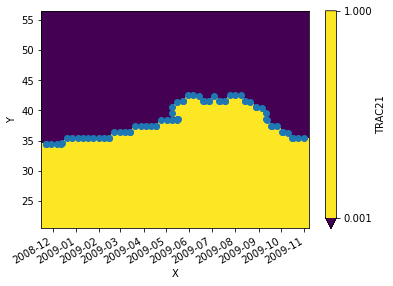

In [120]:
fig, ax = plt.subplots()
tracer_ds["TRAC21"].isel(Z=0).plot.contourf(ax=ax, levels=[.001, 1])
ax.scatter(ss_propocalypse_time, ss_propocalypse_lat)
plt.show()

# Steady State with Constant Light 

In [121]:
file = "/Users/birdy/Documents/eaps_research/darwin3/verification/dar_one_config/run/gp-constant-light/run/ecco_gud_20221212_0001/3d*"
const_light_ds = xr.open_mfdataset(file)
const_light_ds = const_light_ds.rename({'Zmd000001':'Z'})

const_light_ds_mean = const_light_ds.isel(T=slice(-2, -1)).mean(dim="T")
const_light_ds_mean = const_light_ds_mean.where(const_light_ds_mean>0, 0)


# Steady State with Constant Temperature


In [122]:

file = "/Users/birdy/Documents/eaps_research/darwin3/verification/dar_one_config/run/gp-constant-t/run/ecco_gud_20221212_0001/3d*"
const_t_ds = xr.open_mfdataset(file)
const_t_ds = const_t_ds.rename({'Zmd000001':'Z'})

const_t_ds_mean = const_t_ds.isel(T=slice(-2, -1)).mean(dim="T")
const_t_ds_mean = const_t_ds_mean.where(const_t_ds_mean>0, 0)


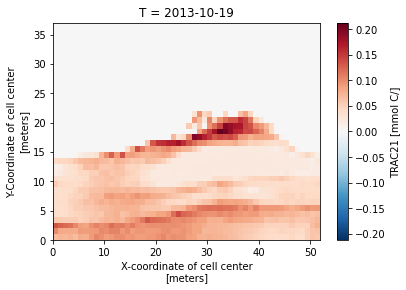

In [123]:
const_t_ds["TRAC21"].isel(T=-1).plot()

In [124]:

file = "/Users/birdy/Documents/eaps_research/darwin3/verification/dar_one_config/run/gp-constant-t-20/run/ecco_gud_20221212_0001/3d*"
const_t_20_ds = xr.open_mfdataset(file)
const_t_20_ds = const_t_20_ds.rename({'Zmd000001':'Z'})

const_t_20_ds_mean = const_t_20_ds.isel(T=slice(-2, -1)).mean(dim="T")
const_t_20_ds_mean = const_t_20_ds_mean.where(const_t_20_ds_mean>0, 0)


# HASTILY WRITTEN CODE for presentation

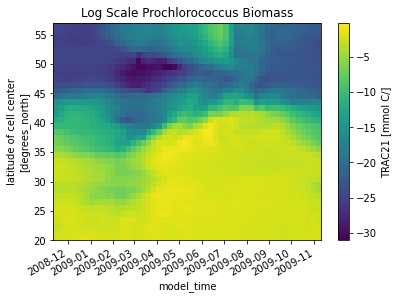

In [132]:
fig, ax = plt.subplots()
np.log(seed_ds_3d["TRAC21"].isel(Z=z).sel(X=x, Y=slice(20, 57))).T.plot(ax=ax)
ax.set_title("Log Scale Prochlorococcus Biomass")
plt.show()

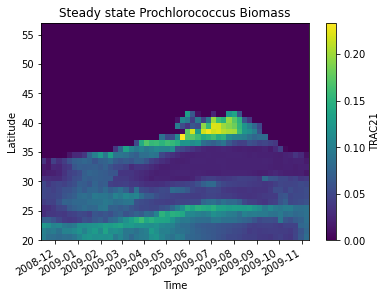

In [136]:
fig, ax = plt.subplots()
pretty_plot_lat_over_time(ax, tracer_ds["TRAC21"])
ax.set_title("Steady state Prochlorococcus Biomass")
plt.show()

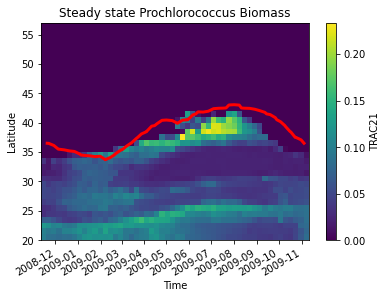

In [138]:
fig, ax = plt.subplots()
pretty_plot_lat_over_time(ax, tracer_ds["TRAC21"])
ax.set_title("Steady state Prochlorococcus Biomass")
ax.plot(propocalypse_time, propocalypse_lat, c='r', lw=3)
plt.show()

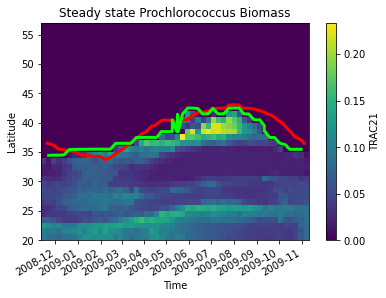

In [142]:
fig, ax = plt.subplots()
pretty_plot_lat_over_time(ax, tracer_ds["TRAC21"])
ax.set_title("Steady state Prochlorococcus Biomass")
ax.plot(propocalypse_time, propocalypse_lat, c='r', lw=3)
ax.plot(ss_propocalypse_time, ss_propocalypse_lat, c='lime', lw=3)
plt.show()


In [145]:
y_slice = slice(35.5, 45.5)
x_axis = seed_ds_3d["T"].data
y_axis = seed_ds_3d.sel(Y=y_slice)["Y"].data

my_da = const_light_ds_mean.sel(Y=y_slice).assign_coords({"Y":y_axis})
my_da = my_da.assign_coords({"X":x_axis})

my_da.plot(ax=ax, vmin=vmin, vmax=vmax)
ax.set_xlabel("Time")
ax.set_ylabel("Latitude")
ax.set_title(title)
ax.scatter(propocalypse_time, propocalypse_lat, c='r')

ValueError: conflicting sizes for dimension 'Y': length 11 on 'Y' and length 2 on {'Z': 'diag_levels', 'Y': 'TRAC01', 'X': 'TRAC01'}

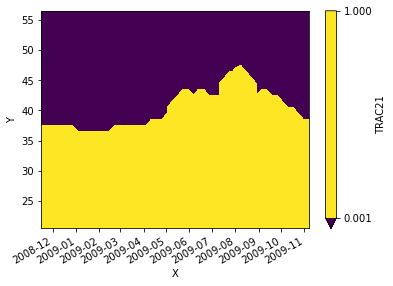

In [157]:
x_axis = seed_ds_3d["T"].data
y_axis = seed_ds_3d.isel(Y=slice(100, 137))["Y"].data

const_light_ds_mean = const_light_ds_mean.assign_coords({"Y":y_axis})
const_light_ds_mean = const_light_ds_mean.assign_coords({"X":x_axis})
ss_light_propocalypse_time, ss_light_propocalypse_lat = get_ss_propocalypse_line(const_light_ds_mean)

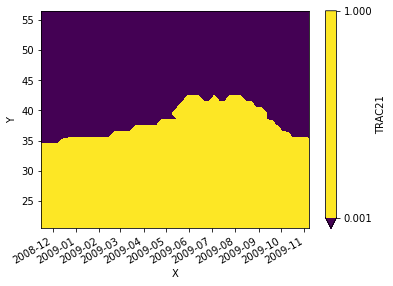

In [163]:
x_axis = seed_ds_3d["T"].data
y_axis = seed_ds_3d.isel(Y=slice(100, 137))["Y"].data

const_t_ds_mean = const_t_ds_mean.assign_coords({"Y":y_axis})
const_t_ds_mean = const_t_ds_mean.assign_coords({"X":x_axis})
ss_t_propocalypse_time, ss_t_propocalypse_lat = get_ss_propocalypse_line(const_t_ds_mean)

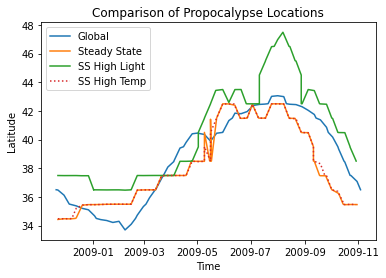

In [171]:
fig, ax = plt.subplots()
l1, = ax.plot(propocalypse_time, propocalypse_lat)
l2, = ax.plot(ss_propocalypse_time, ss_propocalypse_lat)
l3, = ax.plot(ss_light_propocalypse_time, ss_light_propocalypse_lat)
l4, = ax.plot(ss_t_propocalypse_time, ss_t_propocalypse_lat, linestyle="dotted")

ax.legend([l1, l2, l3, l4], ["Global", "Steady State", "SS High Light", "SS High Temp"])
ax.set_ylabel("Latitude")
ax.set_xlabel("Time")
ax.set_title("Comparison of Propocalypse Locations")
plt.show()